In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
df_houses = pd.read_csv('KingCountyHomePriceData.csv')

In [125]:
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Assignment
Select an outcome variable and then pick four other variables (one categorical, four continuous) to act as the basis for features. 
Explore the variables using the univariate and bivariate methods you've learned so far.
Create ten new features. 
Explain the reasoning behind each one.
Select the five best features and justify your choices.

# General Description of Dataset

(Add more here from Kaggle. King County contains Seattle.) The outcome variable is: price. The four continuous variables are: sqft_living, sqft_lot, bedrooms, bathrooms.  The categorical variable is: zipcode.

In [4]:
print(df_houses.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [126]:
len(df_houses.columns)

21

In [127]:
len(df_houses)

21613

# Univariate Analysis

There are 21 variables in the dataset, of which we have selected six for exploration.

In [5]:
#Number of datapoints = 21613 rows x 21 columns.
21613*21
#Impressively, there is no missing data.

453873

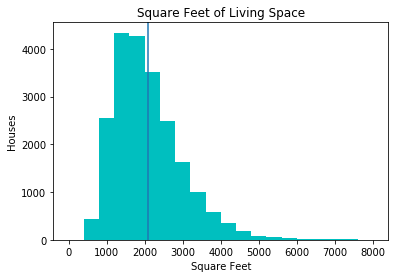

In [34]:
plt.hist(df_houses['sqft_living'],bins = 20, color = 'c',range =(0,8000))
plt.title('Square Feet of Living Space')
plt.xlabel('Square Feet')
plt.ylabel('Houses')
plt.axvline(df_houses['sqft_living'].mean())

In [7]:
# Square feet of living space is approximately normal, but skewed to the left, with a long tail and an outlier max.
df_houses.sqft_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

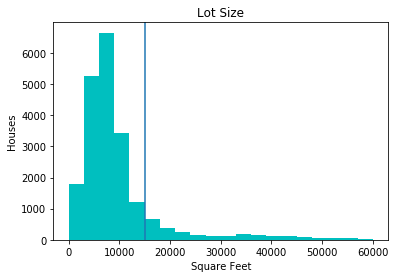

In [38]:
plt.hist(df_houses['sqft_lot'],bins = 20, color = 'c',range = (0,60000))
plt.title('Lot Size')
plt.xlabel('Square Feet')
plt.ylabel('Houses')
plt.axvline(df_houses['sqft_lot'].mean())

In [11]:
# Lot size is approximately normal, but skewed to the left, with a very long tail.
df_houses.sqft_lot.describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

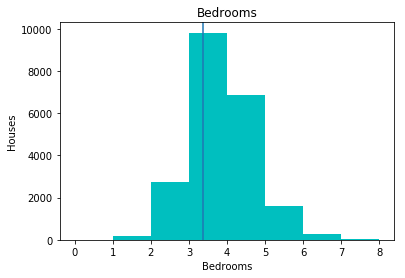

In [47]:
plt.hist(df_houses['bedrooms'],bins = 8, color = 'c',range=(0,8))
plt.title('Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Houses')
plt.axvline(df_houses['bedrooms'].mean())

In [12]:
# Bedrooms is approximately normal, but somebody has a house with 33 bedrooms.
df_houses.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

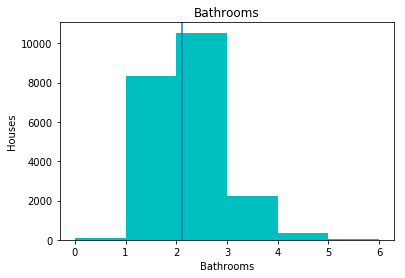

In [48]:
plt.hist(df_houses['bathrooms'],bins = 6, color = 'c',range=(0,6))
plt.title('Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Houses')
plt.axvline(df_houses['bathrooms'].mean())

In [17]:
# Bathrooms is approximately normal, but skewed to the left.
df_houses.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

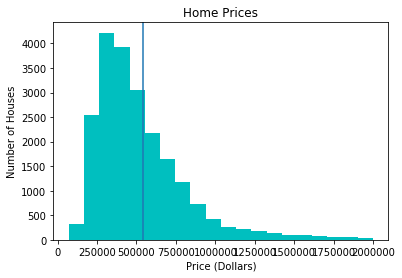

In [52]:
plt.hist(df_houses['price'],bins = 20, color = 'c',range=(70000,2000000))
plt.title('Home Prices')
plt.xlabel('Price (Dollars)')
plt.ylabel('Number of Houses')
plt.axvline(df_houses['price'].mean())

In [20]:
# Price is approximately normal, but skewed to the left with a very long tail.
df_houses.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [82]:
zip_count = df_houses.groupby('zipcode').count().apply(lambda x: x.sort_values(ascending=False))
zip_count.head().iloc[:,0]

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
Name: id, dtype: int64

In [101]:
zip_avg = df_houses.groupby('zipcode').mean().sort_values(by='price', ascending=False)
zip_avg.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,,,
98039,3.755708e+09,2.160607e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.020000,0.440000,3.480000,9.560000,3290.900000,510.000000,1972.520000,398.600000,47.625840,-122.233540,3132.200000,17291.100000
98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
98040,4.199323e+09,1.194230e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.042553,0.783688,3.787234,8.960993,2474.329787,632.503546,1971.471631,233.574468,47.559846,-122.225592,2898.744681,12801.283688
98112,4.826282e+09,1.095499e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,0.148699,3.516729,8.442379,2005.695167,493.048327,1944.449814,223.144981,47.629619,-122.297866,2280.078067,4898.159851
98102,4.123034e+09,9.012583e+05,3.219048,2.261905,2159.742857,3616.190476,2.004762,0.000000,0.171429,3.371429,8.285714,1764.933333,394.809524,1952.523810,113.923810,47.634607,-122.322248,1958.333333,3310.133333


# Bivariate Analysis

In [3]:
# Make a dataframe with just the four continuous variables and the outcome variable price.
df_five = df_houses[['sqft_living','sqft_lot','bedrooms','bathrooms','price']]
df_five.head()

,sqft_living,sqft_lot,bedrooms,bathrooms,price
0,1180,5650,3,1.00,221900.0
1,2570,7242,3,2.25,538000.0
2,770,10000,2,1.00,180000.0
3,1960,5000,4,3.00,604000.0
4,1680,8080,3,2.00,510000.0


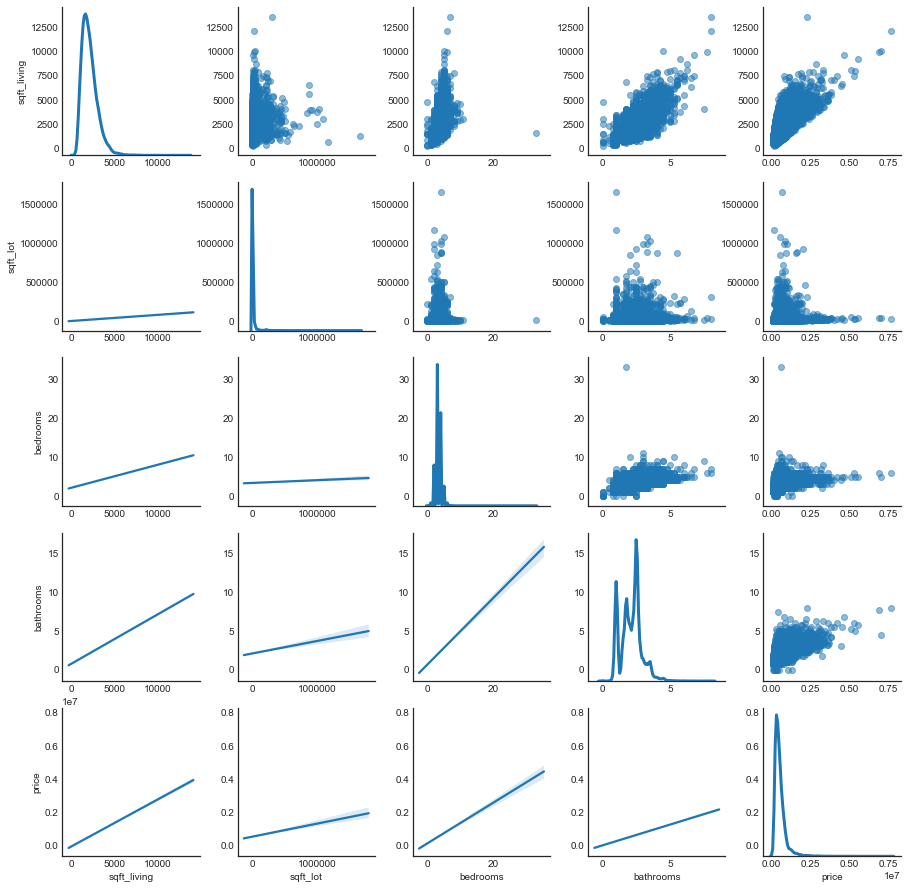

In [131]:
sns.set_style("white")
# Make a scatterplot matrix.
m = sns.PairGrid(df_five, diag_sharey=False)

# Scatterplot in upper right
m.map_upper(plt.scatter, alpha=.5)

# Fit line in lower left summarizing the linear relationship of the two variables.
m.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# On the diagonal, give Kernel Density Estimation of each variable.
m.map_diag(sns.kdeplot, lw=3)

             sqft_living  sqft_lot  bedrooms  bathrooms     price
sqft_living     1.000000  0.172826  0.576671   0.754665  0.702035
sqft_lot        0.172826  1.000000  0.031703   0.087740  0.089661
bedrooms        0.576671  0.031703  1.000000   0.515884  0.308350
bathrooms       0.754665  0.087740  0.515884   1.000000  0.525138
price           0.702035  0.089661  0.308350   0.525138  1.000000


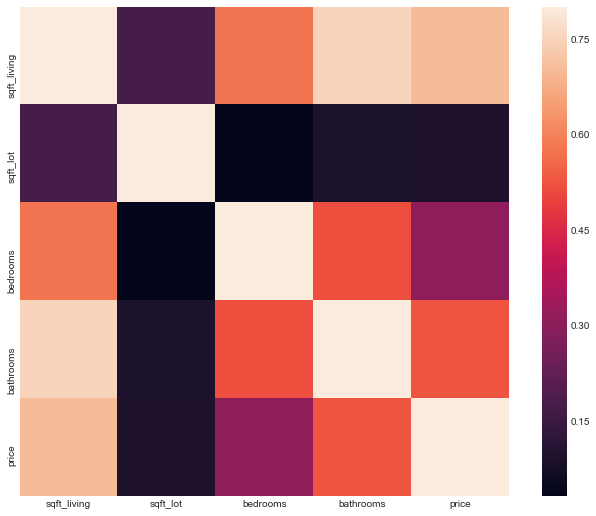

In [132]:
# Make the correlation matrix.
corrmat = df_five.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)

# Aspects of the results in words:
# Price is closely correlated with square feet of living space, but not at all correlated with lot size.
# Big homes command high prices and not lots of land.
# Lot size is only loosely correlated with square feet of living space. A high proportion of big houses must be 
# near their neighbors.
# Bathrooms are closely correlated with square feet of living space. As the house gets bigger, the number of bathroooms
# increases accordingly.
# Bedrooms are less closely correlated with square feet of living space. As the house gets bigger, the number of 
# bedrooms increases gradually.

(0, 7500000)

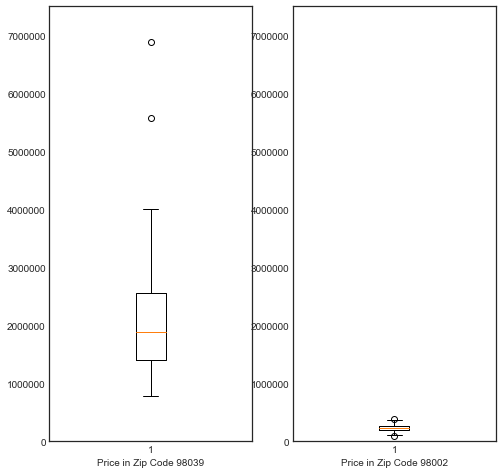

In [133]:
# Comparing two zipcodes - highest average price (98039) with lowest average price (98002).
# A wide disparity within the County.
find_98039 = df_houses.zipcode.apply(lambda x:x==98039)
df_98039 = df_houses.loc[find_98039,:]

find_98002 = df_houses.zipcode.apply(lambda x:x==98002)
df_98002 = df_houses.loc[find_98002,:]

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.boxplot(df_98039.price)
plt.xlabel('Price in Zip Code 98039')
plt.ylim(0,7500000)

plt.subplot(1,2,2)
plt.boxplot(df_98002.price)
plt.xlabel('Price in Zip Code 98002')
plt.ylim(0,7500000)

# Ten Features

In [139]:
# Ten possible features to explain the outcome variable price are:
# 1. sqft_living
# 2. sqft_lot
# 3. bathrooms
# 4. bedrooms
# 5. the smaller of: (bathrooms, bedrooms) for a given house
# 6. an average of bathrooms and bedrooms, weighted in a ratio of 5:3 respectively, based on 
#    their respective correlations with price.
# 7. an average of sqft_living and sqft_lot, weighted in a ratio of 7:1 respectively, base on 
#    their respective correlations with price.
# 8. total of bathrooms and bedrooms
# 9. total of sqft_living and sqft_lot
# 10. a scaled composite of sqft_living, bathrooms, and bedrooms

# Best Features

In [12]:
# Make a dataframe with just the four continuous variables without the outcome variable price.
df_four = df_houses[['sqft_living','sqft_lot','bedrooms','bathrooms']]
df_four.head()

,sqft_living,sqft_lot,bedrooms,bathrooms
0,1180,5650,3,1.00
1,2570,7242,3,2.25
2,770,10000,2,1.00
3,1960,5000,4,3.00
4,1680,8080,3,2.00


In [13]:
pca = PCA(n_components=4)
pca.fit(df_four)
print(pca.explained_variance_ratio_)
# Percentage of total variance in the dataset explained by each component:

[  9.99523259e-01   4.76740996e-04   3.39450715e-10   1.42612404e-10]


In [15]:
pca.transform(df_four).shape

(21613, 4)